In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="WWomuQiubiGPkogz1Cmr")
project = rf.workspace("pose-2n8xx").project("golf-swing-2")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...


loading Roboflow project...



Extracting Dataset Version Zip to golf-swing-2-3 in yolov8:: 100%|██████████| 25168/25168 [00:04<00:00, 5413.50it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
import os

def print_directory_tree(root_dir, prefix=""):
    # 현재 디렉토리의 하위 항목들을 가져옴
    entries = [entry for entry in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, entry))]
    entries_count = len(entries)
    
    # 각 항목을 처리
    for index, entry in enumerate(entries):
        connector = "└──" if index == entries_count - 1 else "├──"
        print(f"{prefix}{connector} {entry}")
        
        # 하위 디렉토리가 있는 경우 재귀적으로 호출
        new_prefix = "    " if index == entries_count - 1 else "│   "
        print_directory_tree(os.path.join(root_dir, entry), prefix + new_prefix)

# 실행 예시
root_directory = "golf-swing-2-3"  # 여기에 탐색할 루트 디렉토리 경로를 입력하세요.
print(root_directory)
print_directory_tree(root_directory)

golf-swing-2-3
├── test
│   ├── images
│   └── labels
├── train
│   ├── images
│   └── labels
└── valid
    ├── images
    └── labels


In [7]:
import os

# 데이터셋 폴더 경로 정의
base_paths = ['golf-swing-2-3/test', 'golf-swing-2-3/train', 'golf-swing-2-3/valid']  # 상대 경로로 설정

# 각 폴더의 이미지 파일 개수를 저장할 딕셔너리
image_counts = {}

for base in base_paths:
    images_path = os.path.join(base, 'images')
    if os.path.exists(images_path):
        # 이미지 파일 개수 세기
        image_count = len([f for f in os.listdir(images_path) if f.endswith(('.jpg', '.png', '.jpeg'))])
    else:
        image_count = 0  # 폴더가 존재하지 않으면 0으로 설정
    image_counts[base] = image_count

# 결과 출력
for folder, count in image_counts.items():
    print(f"{folder}의 이미지 파일 개수: {count}")

golf-swing-2-3/test의 이미지 파일 개수: 333
golf-swing-2-3/train의 이미지 파일 개수: 11546
golf-swing-2-3/valid의 이미지 파일 개수: 699


In [8]:
import os
from collections import defaultdict

# 데이터셋 폴더 경로 정의
base_paths = ['golf-swing-2-3/test', 'golf-swing-2-3/train', 'golf-swing-2-3/valid']

# 클래스별 이미지 개수를 저장할 딕셔너리
class_image_counts = defaultdict(int)

# 각 폴더에서 이미지 파일 개수 및 라벨 파일 읽기
for base in base_paths:
    images_path = os.path.join(base, 'images')
    labels_path = os.path.join(base, 'labels')
    
    if os.path.exists(images_path) and os.path.exists(labels_path):
        # 이미지 파일 목록 가져오기
        image_files = [f for f in os.listdir(images_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
        
        # 각 이미지에 대한 라벨 파일 처리
        for image_file in image_files:
            label_file = os.path.splitext(image_file)[0] + '.txt'
            label_path = os.path.join(labels_path, label_file)
            
            if os.path.exists(label_path):
                with open(label_path, 'r') as file:
                    lines = file.readlines()
                    
                    # 클래스 ID 확인 및 카운트
                    unique_classes_in_image = set()  # 한 이미지에 중복된 클래스는 한 번만 카운트
                    for line in lines:
                        if line.strip():  # 비어 있지 않은 경우에만 처리
                            class_id = line.split()[0]  # YOLO 형식에서 클래스 ID는 첫 번째 값
                            unique_classes_in_image.add(class_id)
                    
                    # 해당 이미지에 포함된 각 클래스의 카운트 증가
                    for class_id in unique_classes_in_image:
                        class_image_counts[class_id] += 1

# 결과 출력
print("클래스별 이미지 파일 개수:")
for class_id, count in class_image_counts.items():
    print(f"클래스 {class_id}: {count}개")

클래스별 이미지 파일 개수:
클래스 2: 1268개
클래스 3: 1985개
클래스 6: 1399개
클래스 1: 1613개
클래스 4: 1245개
클래스 7: 2722개
클래스 0: 1758개
클래스 5: 704개


In [9]:
import os
import glob

# 유지할 라벨 번호 정의
labels_to_keep = {'0', '2', '4', '5', '7'}
# 데이터셋 폴더 경로 정의
base_paths = ['golf-swing-2-3/test', 'golf-swing-2-3/train', 'golf-swing-2-3/valid']

for base in base_paths:
    images_path = os.path.join(base, 'images')
    labels_path = os.path.join(base, 'labels')
    
    # 모든 라벨 파일 가져오기
    label_files = glob.glob(os.path.join(labels_path, '*.txt'))

    for label_file in label_files:
        with open(label_file, 'r') as file:
            lines = file.readlines()
        
        # 유지할 라벨만 필터링
        filtered_lines = [line for line in lines if line.split()[0] in labels_to_keep]
        
        # 필터링 후 내용이 없다면 이미지와 라벨 파일 삭제
        if not filtered_lines:
            image_file = os.path.join(images_path, os.path.basename(label_file).replace('.txt', '.jpg'))
            if os.path.exists(image_file):
                os.remove(image_file)  # 이미지 파일 삭제
            os.remove(label_file)  # 라벨 파일 삭제
        else:
            # 필터링된 내용으로 라벨 파일 덮어쓰기
            with open(label_file, 'w') as file:
                file.writelines(filtered_lines)

In [10]:
import os
from collections import defaultdict

# 데이터셋 폴더 경로 정의
base_paths = ['golf-swing-2-3/test', 'golf-swing-2-3/train', 'golf-swing-2-3/valid']

# 클래스별 이미지 개수를 저장할 딕셔너리
class_image_counts = defaultdict(int)

# 각 폴더에서 이미지 파일 개수 및 라벨 파일 읽기
for base in base_paths:
    images_path = os.path.join(base, 'images')
    labels_path = os.path.join(base, 'labels')
    
    if os.path.exists(images_path) and os.path.exists(labels_path):
        # 이미지 파일 목록 가져오기
        image_files = [f for f in os.listdir(images_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
        
        # 각 이미지에 대한 라벨 파일 처리
        for image_file in image_files:
            label_file = os.path.splitext(image_file)[0] + '.txt'
            label_path = os.path.join(labels_path, label_file)
            
            if os.path.exists(label_path):
                with open(label_path, 'r') as file:
                    lines = file.readlines()
                    
                    # 클래스 ID 확인 및 카운트
                    unique_classes_in_image = set()  # 한 이미지에 중복된 클래스는 한 번만 카운트
                    for line in lines:
                        if line.strip():  # 비어 있지 않은 경우에만 처리
                            class_id = line.split()[0]  # YOLO 형식에서 클래스 ID는 첫 번째 값
                            unique_classes_in_image.add(class_id)
                    
                    # 해당 이미지에 포함된 각 클래스의 카운트 증가
                    for class_id in unique_classes_in_image:
                        class_image_counts[class_id] += 1

# 결과 출력
print("클래스별 이미지 파일 개수:")
for class_id, count in class_image_counts.items():
    print(f"클래스 {class_id}: {count}개")

클래스별 이미지 파일 개수:
클래스 2: 1268개
클래스 4: 1245개
클래스 7: 2722개
클래스 0: 1758개
클래스 5: 704개


In [14]:
import os

# 교체 매핑 정의
to_replace = {'0': '0', '2': '1', '4': '2', '5': '3', '7': '4'}

# 데이터셋 폴더 경로 정의
base_paths = ['golf-swing-2-3/test', 'golf-swing-2-3/train', 'golf-swing-2-3/valid']

for base in base_paths:
    labels_path = os.path.join(base, 'labels')
    
    if os.path.exists(labels_path):
        # 모든 라벨 파일 가져오기
        label_files = [f for f in os.listdir(labels_path) if f.endswith('.txt')]
        
        for label_file in label_files:
            label_path = os.path.join(labels_path, label_file)
            with open(label_path, 'r') as file:
                lines = file.readlines()
            
            # 교체된 라벨을 저장할 리스트
            updated_lines = []
            for line in lines:
                if line.strip():  # 비어있지 않은 경우에만 처리
                    parts = line.split()
                    original_class = parts[0]  # 클래스 ID는 첫 번째 값
                    # 교체하기 위한 새로운 클래스 ID 적용
                    if original_class in to_replace:
                        parts[0] = to_replace[original_class]
                    updated_lines.append(' '.join(parts) + '\n')

            # 라벨 파일 덮어쓰기
            with open(label_path, 'w') as file:
                file.writelines(updated_lines)

In [15]:
import os
from collections import defaultdict

# 데이터셋 폴더 경로 정의
base_paths = ['golf-swing-2-3/test', 'golf-swing-2-3/train', 'golf-swing-2-3/valid']

# 클래스별 이미지 개수를 저장할 딕셔너리
class_image_counts = defaultdict(int)

# 각 폴더에서 이미지 파일 개수 및 라벨 파일 읽기
for base in base_paths:
    images_path = os.path.join(base, 'images')
    labels_path = os.path.join(base, 'labels')
    
    if os.path.exists(images_path) and os.path.exists(labels_path):
        # 이미지 파일 목록 가져오기
        image_files = [f for f in os.listdir(images_path) if f.endswith(('.jpg', '.png', '.jpeg'))]
        
        # 각 이미지에 대한 라벨 파일 처리
        for image_file in image_files:
            label_file = os.path.splitext(image_file)[0] + '.txt'
            label_path = os.path.join(labels_path, label_file)
            
            if os.path.exists(label_path):
                with open(label_path, 'r') as file:
                    lines = file.readlines()
                    
                    # 클래스 ID 확인 및 카운트
                    unique_classes_in_image = set()  # 한 이미지에 중복된 클래스는 한 번만 카운트
                    for line in lines:
                        if line.strip():  # 비어 있지 않은 경우에만 처리
                            class_id = line.split()[0]  # YOLO 형식에서 클래스 ID는 첫 번째 값
                            unique_classes_in_image.add(class_id)
                    
                    # 해당 이미지에 포함된 각 클래스의 카운트 증가
                    for class_id in unique_classes_in_image:
                        class_image_counts[class_id] += 1

# 결과 출력
print("클래스별 이미지 파일 개수:")
for class_id, count in class_image_counts.items():
    print(f"클래스 {class_id}: {count}개")

클래스별 이미지 파일 개수:
클래스 1: 1268개
클래스 2: 1245개
클래스 4: 2722개
클래스 0: 1758개
클래스 3: 704개


Processing trimmed_mYaDUseJYWA_mp4-9_jpg.rf.09aaafc83b992e2e419f66f82f4c13e0.jpg and trimmed_mYaDUseJYWA_mp4-9_jpg.rf.09aaafc83b992e2e419f66f82f4c13e0.txt


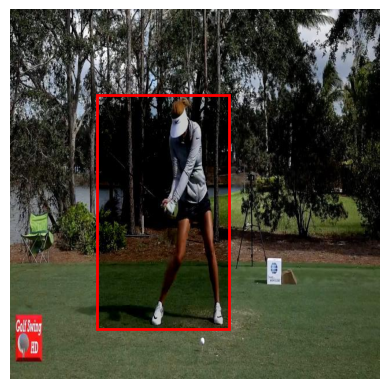

Processing Dustin-Johnson-Mid-Iron-Swing-in-SUPER-Slow-Motion-TaylorMade-Golf_mp4-34_jpg.rf.f184f66213b6e26613f702bacd1c9de8.jpg and Dustin-Johnson-Mid-Iron-Swing-in-SUPER-Slow-Motion-TaylorMade-Golf_mp4-34_jpg.rf.f184f66213b6e26613f702bacd1c9de8.txt


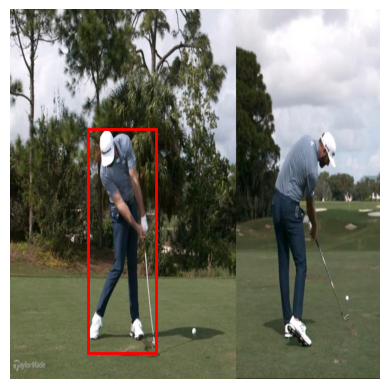

Processing trimmed_RYylCwgEBSM_mp4-20_jpg.rf.1d3181153a88e74d6712761e0aa8376d.jpg and trimmed_RYylCwgEBSM_mp4-20_jpg.rf.1d3181153a88e74d6712761e0aa8376d.txt


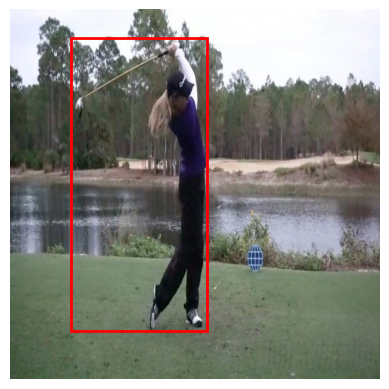

Processing trimmed_-wg8m-A0hx4_mp4-29_jpg.rf.9e9c22a6ec5ec7a31b5daaa2837194cb.jpg and trimmed_-wg8m-A0hx4_mp4-29_jpg.rf.9e9c22a6ec5ec7a31b5daaa2837194cb.txt


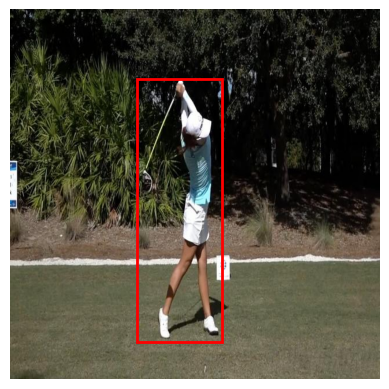

Processing trimmed_1a2QrnvBUuI_mp4-4_jpg.rf.0b8e735825d6afe0b3c8a0b3306161ce.jpg and trimmed_1a2QrnvBUuI_mp4-4_jpg.rf.0b8e735825d6afe0b3c8a0b3306161ce.txt


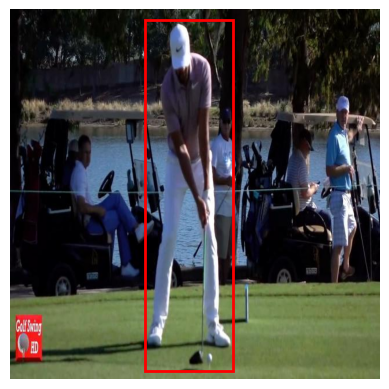

Processing trimmed_CAlO52kAYHE_mp4-27_jpg.rf.5c9f4ed0b70e4c657a3670ae2cc60b8e.jpg and trimmed_CAlO52kAYHE_mp4-27_jpg.rf.5c9f4ed0b70e4c657a3670ae2cc60b8e.txt


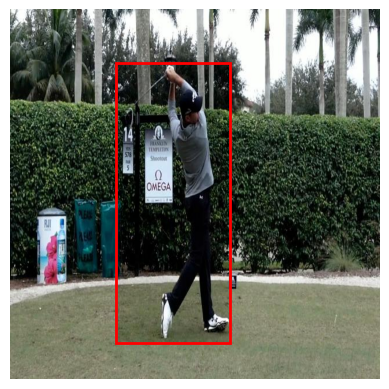

Processing trimmed_-wg8m-A0hx4_mp4-9_jpg.rf.875a675b535980326d13f7e809e6e3aa.jpg and trimmed_-wg8m-A0hx4_mp4-9_jpg.rf.875a675b535980326d13f7e809e6e3aa.txt


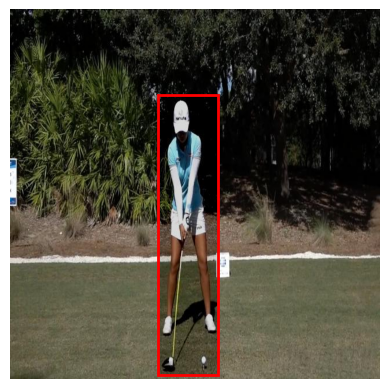

Processing trimmed_CuBNYn0WgLs_mp4-0_jpg.rf.e23fbd522855693024827bbbc32a4d14.jpg and trimmed_CuBNYn0WgLs_mp4-0_jpg.rf.e23fbd522855693024827bbbc32a4d14.txt


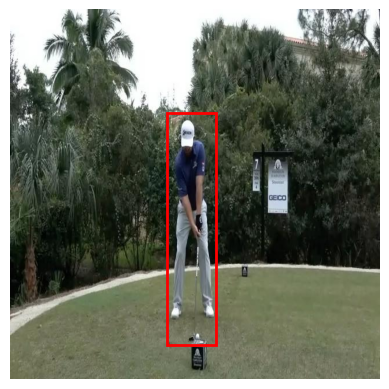

Processing trimmed_mYaDUseJYWA_mp4-15_jpg.rf.062c529d37d7a1755461dcad8566426f.jpg and trimmed_mYaDUseJYWA_mp4-15_jpg.rf.062c529d37d7a1755461dcad8566426f.txt


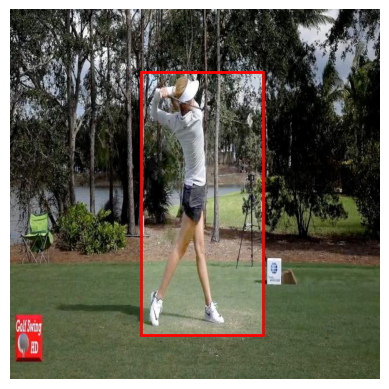

Processing trimmed_mmf_20rpyyg_mp4-3_jpg.rf.a5ff8f40442f69f6a33b3671866e641e.jpg and trimmed_mmf_20rpyyg_mp4-3_jpg.rf.a5ff8f40442f69f6a33b3671866e641e.txt


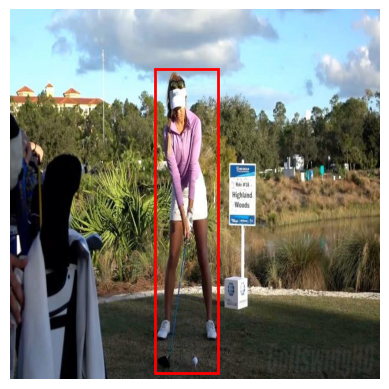

In [16]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

# YOLO 형식의 txt 파일을 읽어 바운딩 박스 정보를 추출하는 함수
def parse_yolo_txt(txt_file, img_width, img_height):
    boxes = []
    with open(txt_file, 'r') as f:
        for line in f.readlines():
            parts = line.strip().split()
            class_id = int(parts[0])
            x_center = float(parts[1])
            y_center = float(parts[2])
            width = float(parts[3])
            height = float(parts[4])

            # YOLO 형식의 값을 실제 이미지 크기로 변환
            xmin = int((x_center - width / 2) * img_width)
            ymin = int((y_center - height / 2) * img_height)
            box_width = int(width * img_width)
            box_height = int(height * img_height)

            # 바운딩 박스 정보 저장 (xmin, ymin, width, height)
            boxes.append((xmin, ymin, box_width, box_height))
    return boxes

# 바운딩 박스를 이미지 위에 그리는 함수
def draw_bounding_boxes(image_path, bounding_boxes):
    # 이미지 읽어오기
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR로 이미지를 읽으므로 RGB로 변환
    img_height, img_width, _ = image.shape

    fig, ax = plt.subplots(1)
    ax.imshow(image_rgb)

    # 바운딩 박스 그리기
    for box in bounding_boxes:
        xmin, ymin, box_width, box_height = box
        # 빨간색 테두리로 바운딩 박스 그리기
        rect = patches.Rectangle((xmin, ymin), box_width, box_height, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

    plt.axis('off')  # 축 숨기기
    plt.show()

# 이미지 폴더와 라벨 폴더에서 랜덤으로 5개의 파일을 선택하여 바운딩 박스를 그리는 함수
def process_random_images_and_labels(image_folder, label_folder, num_samples=5):
    # 이미지 폴더 내의 모든 파일 확인 (확장자가 .jpg인 파일만 처리)
    image_files = [file for file in os.listdir(image_folder) if file.endswith('.jpg')]
    
    # 이미지 파일이 충분한지 확인하고 랜덤으로 num_samples개의 파일 선택
    if len(image_files) < num_samples:
        print(f"폴더에 {num_samples}개 이상의 이미지가 없습니다.")
        return
    
    selected_images = random.sample(image_files, num_samples)

    for image_filename in selected_images:
        # 이미지 파일 이름에서 확장자를 제거하고 .txt 확장자를 붙여서 라벨 파일 경로 생성
        base_filename = os.path.splitext(image_filename)[0]
        label_filename = base_filename + '.txt'
        
        image_path = os.path.join(image_folder, image_filename)
        label_path = os.path.join(label_folder, label_filename)

        # 라벨 파일이 존재하는지 확인
        if os.path.exists(label_path):
            print(f"Processing {image_filename} and {label_filename}")
            
            # 이미지 크기 가져오기
            image = cv2.imread(image_path)
            img_height, img_width, _ = image.shape
            
            # YOLO 라벨 파일을 파싱하여 바운딩 박스 정보 추출
            bounding_boxes = parse_yolo_txt(label_path, img_width, img_height)
            
            # 바운딩 박스를 그리는 함수 호출
            draw_bounding_boxes(image_path, bounding_boxes)
        else:
            print(f"Label file for {image_filename} not found.")

# 이미지와 라벨 파일 경로 설정
image_folder = './golf-swing-2-3/train/images'  # 이미지 파일들이 있는 폴더 경로
label_folder = './golf-swing-2-3/train/labels'  # 라벨 파일들이 있는 폴더 경로

# 랜덤으로 5개의 이미지와 라벨 파일을 처리하여 바운딩 박스를 그리기
process_random_images_and_labels(image_folder, label_folder, num_samples=10)
